# Convolutional Neural Networks (CNNs) with CIFAR-10 dataset

### Import packages

In [66]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

import numpy as np
import matplotlib.pyplot as plt

Libraries imported.


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# code for GPU configuration required

### Initialise Network parameters


In [4]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

Main variables initialised.


In [5]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

Image variables initialisation


### CIFAR-10 data loading and processing

In [6]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Visualisation of two sample CIFAR-10 images

Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.44313726 0.47058824 0.4392157 ]
  [0.43529412 0.4627451  0.43529412]
  [0.4117647  0.4392157  0.41568628]
  ...
  [0.28235295 0.31764707 0.3137255 ]
  [0.28235295 0.3137255  0.30980393]
  [0.28235295 0.3137255  0.30980393]]

 [[0.43529412 0.4627451  0.43137255]
  [0.40784314 0.4

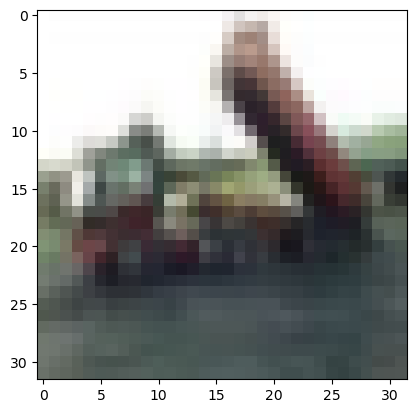

Sample input image: [[[0.6039216  0.69411767 0.73333335]
  [0.49411765 0.5372549  0.53333336]
  [0.4117647  0.40784314 0.37254903]
  ...
  [0.35686275 0.37254903 0.2784314 ]
  [0.34117648 0.3529412  0.2784314 ]
  [0.30980393 0.31764707 0.27450982]]

 [[0.54901963 0.627451   0.6627451 ]
  [0.5686275  0.6        0.6039216 ]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.3764706  0.3882353  0.30588236]
  [0.3019608  0.3137255  0.24313726]
  [0.2784314  0.28627452 0.23921569]]

 [[0.54901963 0.60784316 0.6431373 ]
  [0.54509807 0.57254905 0.58431375]
  [0.4509804  0.4509804  0.4392157 ]
  ...
  [0.30980393 0.32156864 0.2509804 ]
  [0.26666668 0.27450982 0.21568628]
  [0.2627451  0.27058825 0.21568628]]

 ...

 [[0.6862745  0.654902   0.6509804 ]
  [0.6117647  0.6039216  0.627451  ]
  [0.6039216  0.627451   0.6666667 ]
  ...
  [0.16470589 0.13333334 0.14117648]
  [0.23921569 0.20784314 0.22352941]
  [0.3647059  0.3254902  0.35686275]]

 [[0.64705884 0.6039216  0.5019608 ]
  [0.6117647  0.5

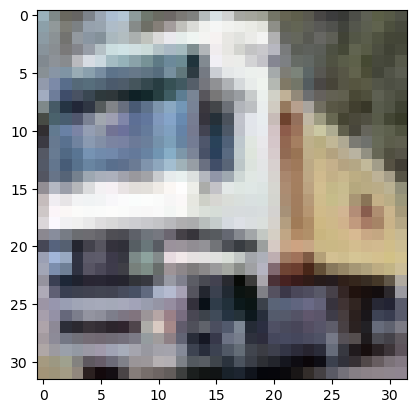

In [11]:
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

Selected_Image = 1
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

### Epoch = 40, Batch_size = 128, 3x3 Kernel, No.of Filters = 32, 7 Layers, No batch normalisation

In [8]:
N_EPOCH = 40 # 40 bigger network will benefit from extra training epochs

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

### Training

In [9]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 37s 115ms/step - loss: 1.9692 - accuracy: 0.2720 - val_loss: 1.8366 - val_accuracy: 0.3320
Epoch 2/40
313/313 [==============================] - 48s 155ms/step - loss: 1.6695 - accuracy: 0.3884 - val_loss: 1.4809 - val_accuracy: 0.4516
Epoch 3/40
313/313 [==============================] - 46s 146ms/step - loss: 1.5079 - accuracy: 0.4507 - val_loss: 1.3590 - val_accuracy: 0.5110
Epoch 4/40
313/313 [==============================] - 47s 149ms/step - loss: 1.3949 - accuracy: 0.4962 - val_loss: 1.2955 - val_accuracy: 0.5285
Epoch 5/40
313/313 [==============================] - 45s 143ms/step - loss: 1.3106 - accuracy: 0.5300 - val_loss: 1.1947 - val_accuracy: 0.5719
Epoch 6/40
313/313 [==============================] - 44s 141ms/step - loss: 1.2486 - accuracy: 0.5529 - val_loss: 1.1365 - val_accuracy: 0.5887
Epoch 7/40
313/313 [==============================] - 43s 138ms/step - loss: 1.1945 - accuracy: 0.5754 - val_loss: 1.1246 - val_ac

### Testing & Result

79/79 [==============================] - 3s 32ms/step - loss: 0.8877 - accuracy: 0.7046

Test score/loss: 0.8877435326576233
Test accuracy: 0.7045999765396118
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


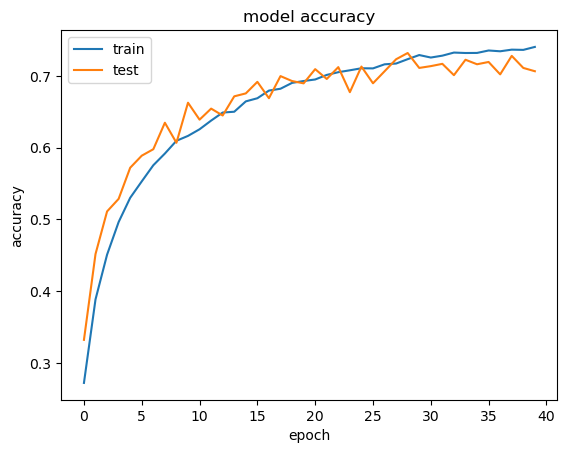

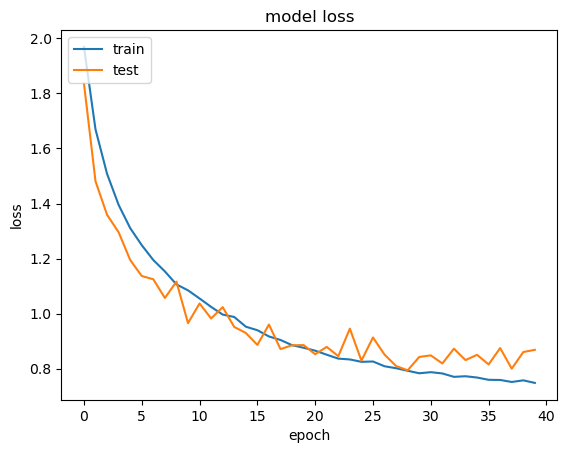

In [10]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3x3 Kernel

In [14]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 40 # use 20 for best initial results

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [15]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
625/625 [==============================] - 48s 76ms/step - loss: 1.8838 - accuracy: 0.2954 - val_loss: 1.5750 - val_accuracy: 0.4173
Epoch 2/40
625/625 [==============================] - 55s 87ms/step - loss: 1.5474 - accuracy: 0.4363 - val_loss: 1.3804 - val_accuracy: 0.5036
Epoch 3/40
625/625 [==============================] - 56s 89ms/step - loss: 1.3782 - accuracy: 0.5027 - val_loss: 1.2040 - val_accuracy: 0.5715
Epoch 4/40
625/625 [==============================] - 51s 82ms/step - loss: 1.2835 - accuracy: 0.5407 - val_loss: 1.1304 - val_accuracy: 0.5983
Epoch 5/40
625/625 [==============================] - 54s 87ms/step - loss: 1.2006 - accuracy: 0.5726 - val_loss: 1.1533 - val_accuracy: 0.5982
Epoch 6/40
625/625 [==============================] - 54s 87ms/step - loss: 1.1381 - accuracy: 0.6015 - val_loss: 1.0653 - val_accuracy: 0.6179
Epoch 7/40
625/625 [==============================] - 51s 81ms/step - loss: 1.0860 - accuracy: 0.6140 - val_loss: 0.9448 - val_accuracy:

157/157 [==============================] - 3s 17ms/step - loss: 0.9501 - accuracy: 0.6828

Test score/loss: 0.9501038789749146
Test accuracy: 0.6827999949455261
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


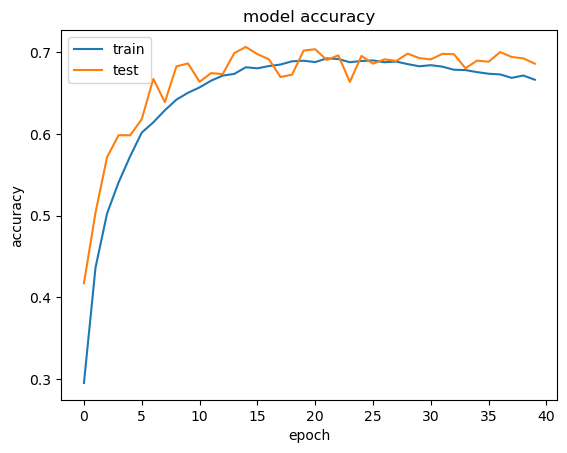

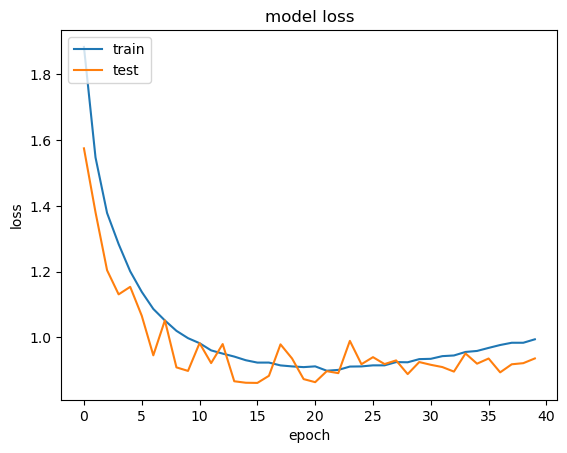

In [16]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4x4 Kernel, epoch = 40 -> 29

In [25]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=4, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=4, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=4, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        1568      
                                                                 
 activation_47 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [26]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 49s 155ms/step - loss: 1.9466 - accuracy: 0.2814 - val_loss: 1.7355 - val_accuracy: 0.3572
Epoch 2/29
313/313 [==============================] - 63s 201ms/step - loss: 1.6039 - accuracy: 0.4162 - val_loss: 1.4314 - val_accuracy: 0.4817
Epoch 3/29
313/313 [==============================] - 65s 207ms/step - loss: 1.4299 - accuracy: 0.4827 - val_loss: 1.2572 - val_accuracy: 0.5534
Epoch 4/29
313/313 [==============================] - 67s 216ms/step - loss: 1.3132 - accuracy: 0.5298 - val_loss: 1.1777 - val_accuracy: 0.5742
Epoch 5/29
313/313 [==============================] - 66s 212ms/step - loss: 1.2310 - accuracy: 0.5615 - val_loss: 1.1349 - val_accuracy: 0.5983
Epoch 6/29
313/313 [==============================] - 70s 224ms/step - loss: 1.1523 - accuracy: 0.5903 - val_loss: 1.0387 - val_accuracy: 0.6308
Epoch 7/29
313/313 [==============================] - 72s 231ms/step - loss: 1.0904 - accuracy: 0.6127 - val_loss: 1.2113 - val_ac

79/79 [==============================] - 2s 31ms/step - loss: 0.8423 - accuracy: 0.7130

Test score/loss: 0.8423246145248413
Test accuracy: 0.7129999995231628
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


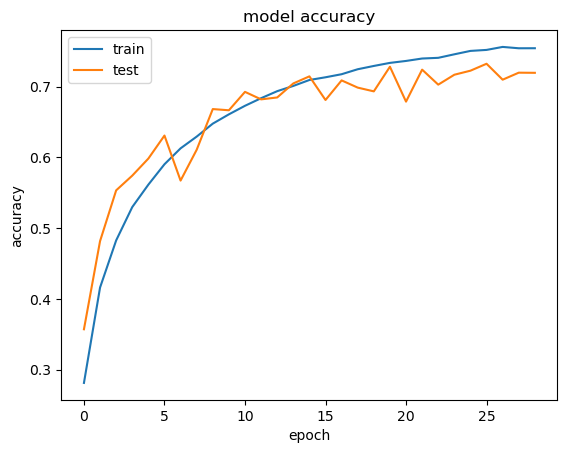

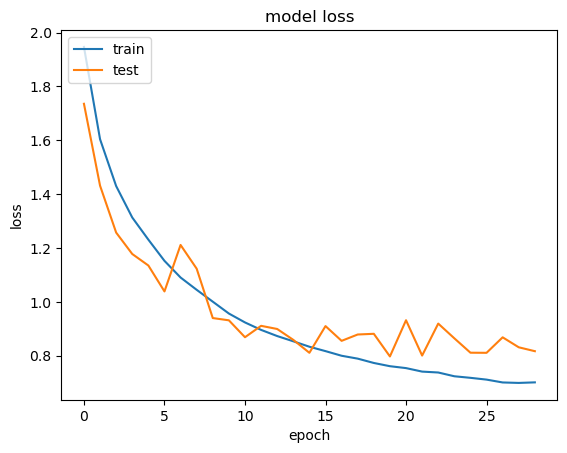

In [27]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_199 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_220 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_200 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_221 (Activation)  (None, 32, 32, 32)     

In [68]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 53s 166ms/step - loss: 1.8310 - accuracy: 0.3481 - val_loss: 2.7327 - val_accuracy: 0.1898
Epoch 2/29
313/313 [==============================] - 58s 187ms/step - loss: 1.4089 - accuracy: 0.4850 - val_loss: 1.7147 - val_accuracy: 0.4136
Epoch 3/29
313/313 [==============================] - 59s 188ms/step - loss: 1.2248 - accuracy: 0.5573 - val_loss: 1.1930 - val_accuracy: 0.5649
Epoch 4/29
313/313 [==============================] - 61s 196ms/step - loss: 1.1330 - accuracy: 0.5936 - val_loss: 1.1387 - val_accuracy: 0.6003
Epoch 5/29
313/313 [==============================] - ETA: 0s - loss: 1.0619 - accuracy: 0.6240

KeyboardInterrupt: 

### 5x5 Kernel

In [29]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=5, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 activation_59 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 activation_60 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 16, 16, 32)        0         
                                                     

In [30]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 73s 230ms/step - loss: 2.0181 - accuracy: 0.2590 - val_loss: 2.2203 - val_accuracy: 0.2692
Epoch 2/29
313/313 [==============================] - 83s 264ms/step - loss: 1.6489 - accuracy: 0.4053 - val_loss: 1.6707 - val_accuracy: 0.3981
Epoch 3/29
313/313 [==============================] - 84s 267ms/step - loss: 1.4647 - accuracy: 0.4729 - val_loss: 1.5646 - val_accuracy: 0.4616
Epoch 4/29
313/313 [==============================] - 81s 257ms/step - loss: 1.3349 - accuracy: 0.5238 - val_loss: 1.2089 - val_accuracy: 0.5654
Epoch 5/29
313/313 [==============================] - 84s 268ms/step - loss: 1.2339 - accuracy: 0.5609 - val_loss: 1.1491 - val_accuracy: 0.5892
Epoch 6/29
313/313 [==============================] - 82s 261ms/step - loss: 1.1612 - accuracy: 0.5900 - val_loss: 1.1801 - val_accuracy: 0.5946
Epoch 7/29
313/313 [==============================] - 84s 268ms/step - loss: 1.0993 - accuracy: 0.6133 - val_loss: 1.0005 - val_ac

79/79 [==============================] - 3s 42ms/step - loss: 0.8866 - accuracy: 0.7207

Test score/loss: 0.8865838050842285
Test accuracy: 0.7207000255584717
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


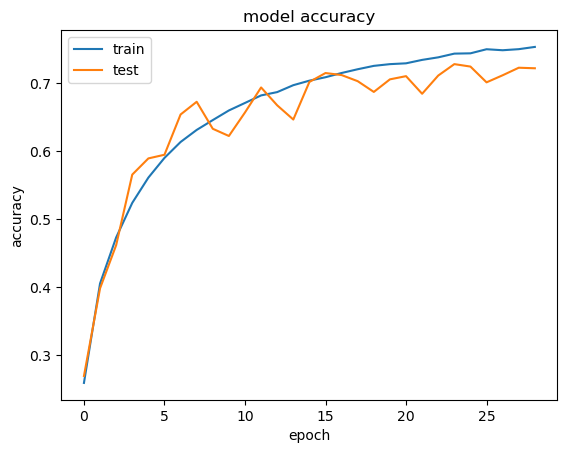

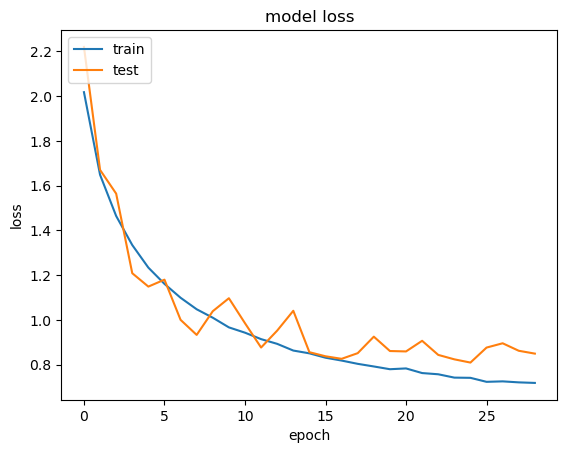

In [31]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### No. of filters = 28

In [32]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(28, kernel_size=5, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(28, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(56, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(56, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(504))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 28)        2128      
                                                                 
 activation_65 (Activation)  (None, 32, 32, 28)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 28)        19628     
                                                                 
 activation_66 (Activation)  (None, 32, 32, 28)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 28)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 16, 16, 28)        0         
                                                     

In [33]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 63s 198ms/step - loss: 2.0215 - accuracy: 0.2464 - val_loss: 1.6605 - val_accuracy: 0.3783
Epoch 2/29
313/313 [==============================] - 66s 210ms/step - loss: 1.6607 - accuracy: 0.3931 - val_loss: 1.5574 - val_accuracy: 0.4288
Epoch 3/29
313/313 [==============================] - 66s 210ms/step - loss: 1.4811 - accuracy: 0.4655 - val_loss: 1.4107 - val_accuracy: 0.4810
Epoch 4/29
313/313 [==============================] - 65s 207ms/step - loss: 1.3757 - accuracy: 0.5052 - val_loss: 1.2514 - val_accuracy: 0.5515
Epoch 5/29
313/313 [==============================] - 70s 224ms/step - loss: 1.2926 - accuracy: 0.5364 - val_loss: 1.2042 - val_accuracy: 0.5661
Epoch 6/29
313/313 [==============================] - 65s 207ms/step - loss: 1.2240 - accuracy: 0.5653 - val_loss: 1.2412 - val_accuracy: 0.5687
Epoch 7/29
313/313 [==============================] - 68s 218ms/step - loss: 1.1547 - accuracy: 0.5896 - val_loss: 1.0913 - val_ac

79/79 [==============================] - 3s 37ms/step - loss: 0.8661 - accuracy: 0.7040

Test score/loss: 0.8661134839057922
Test accuracy: 0.7039999961853027
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


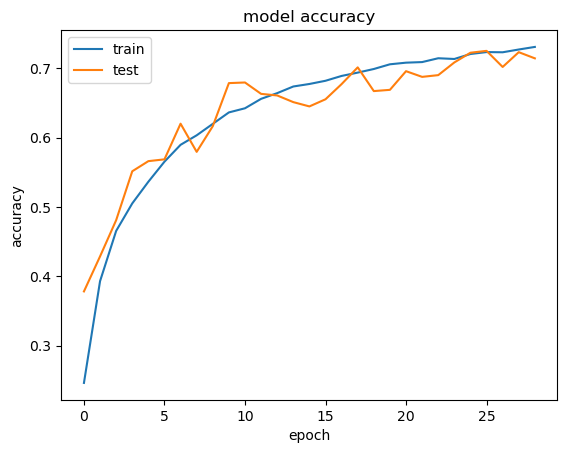

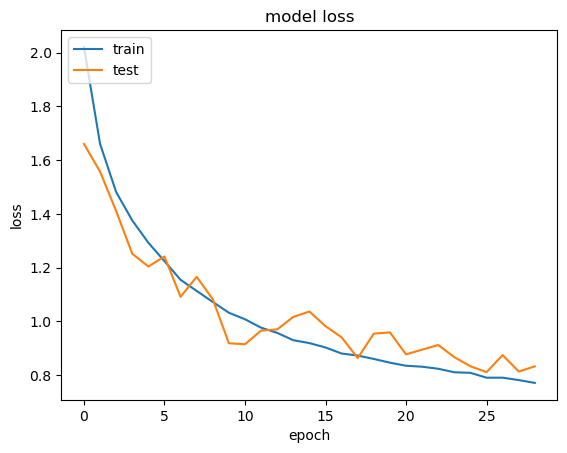

In [35]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7 -> 8 Layers

In [69]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=5, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=5, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
 
model.add(Conv2D(64, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 32, 32, 32)        2432      
                                                                 
 activation_226 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_204 (Conv2D)         (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_103 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 activation_227 (Activation)  (None, 16, 16, 32)       0         
                                                     

In [70]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 157s 501ms/step - loss: 2.3118 - accuracy: 0.1410 - val_loss: 1.9877 - val_accuracy: 0.2586
Epoch 2/29
313/313 [==============================] - 160s 511ms/step - loss: 1.8243 - accuracy: 0.3257 - val_loss: 1.6153 - val_accuracy: 0.4017
Epoch 3/29
313/313 [==============================] - 163s 520ms/step - loss: 1.5082 - accuracy: 0.4582 - val_loss: 1.4705 - val_accuracy: 0.4703
Epoch 4/29
313/313 [==============================] - 159s 507ms/step - loss: 1.2977 - accuracy: 0.5407 - val_loss: 1.2751 - val_accuracy: 0.5519
Epoch 5/29
313/313 [==============================] - 160s 513ms/step - loss: 1.1333 - accuracy: 0.6049 - val_loss: 1.2001 - val_accuracy: 0.5980
Epoch 6/29
313/313 [==============================] - 158s 505ms/step - loss: 1.0260 - accuracy: 0.6433 - val_loss: 1.0433 - val_accuracy: 0.6445
Epoch 7/29
313/313 [==============================] - 161s 515ms/step - loss: 0.9339 - accuracy: 0.6781 - val_loss: 1.1235 -

79/79 [==============================] - 7s 90ms/step - loss: 0.7735 - accuracy: 0.7391

Test score/loss: 0.7735087275505066
Test accuracy: 0.7390999794006348
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


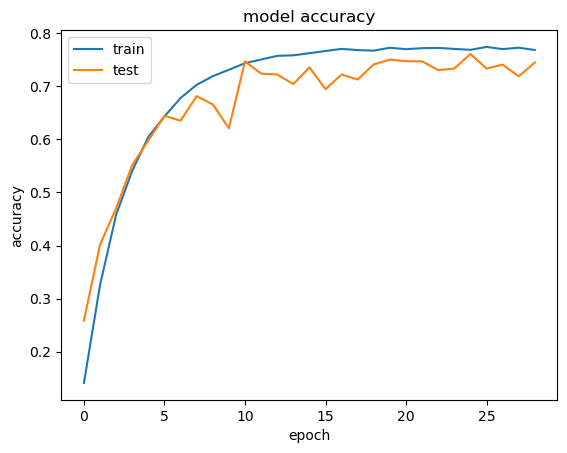

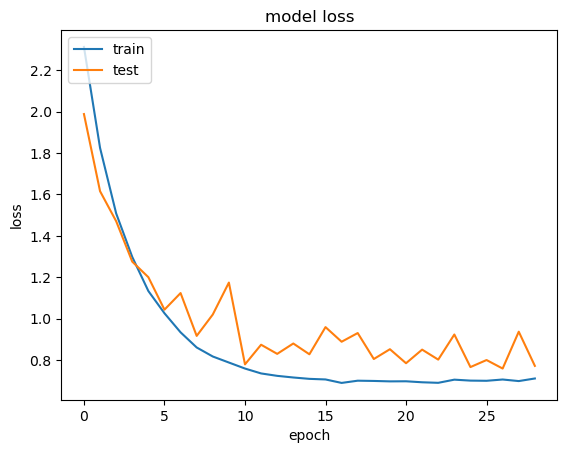

In [71]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Batch Normalisation

In [72]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 29 # use 20 for best initial results
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=5, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
 
model.add(Conv2D(64, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_209 (Conv2D)         (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_234 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 conv2d_210 (Conv2D)         (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 16, 16, 32)     

In [73]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/29
313/313 [==============================] - 170s 539ms/step - loss: 1.6051 - accuracy: 0.4486 - val_loss: 2.0076 - val_accuracy: 0.3705
Epoch 2/29
313/313 [==============================] - 177s 567ms/step - loss: 1.0184 - accuracy: 0.6413 - val_loss: 1.9972 - val_accuracy: 0.4465
Epoch 3/29
313/313 [==============================] - 180s 575ms/step - loss: 0.8285 - accuracy: 0.7089 - val_loss: 1.8375 - val_accuracy: 0.5088
Epoch 4/29
313/313 [==============================] - 182s 582ms/step - loss: 0.7175 - accuracy: 0.7482 - val_loss: 1.1282 - val_accuracy: 0.6536
Epoch 5/29
313/313 [==============================] - 181s 577ms/step - loss: 0.6453 - accuracy: 0.7746 - val_loss: 0.8403 - val_accuracy: 0.7276
Epoch 6/29
313/313 [==============================] - 175s 559ms/step - loss: 0.5807 - accuracy: 0.7991 - val_loss: 0.7307 - val_accuracy: 0.7527
Epoch 7/29
313/313 [==============================] - 186s 594ms/step - loss: 0.5415 - accuracy: 0.8135 - val_loss: 0.9835 -

79/79 [==============================] - 9s 111ms/step - loss: 1.4059 - accuracy: 0.8160

Test score/loss: 1.4058512449264526
Test accuracy: 0.8159999847412109
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


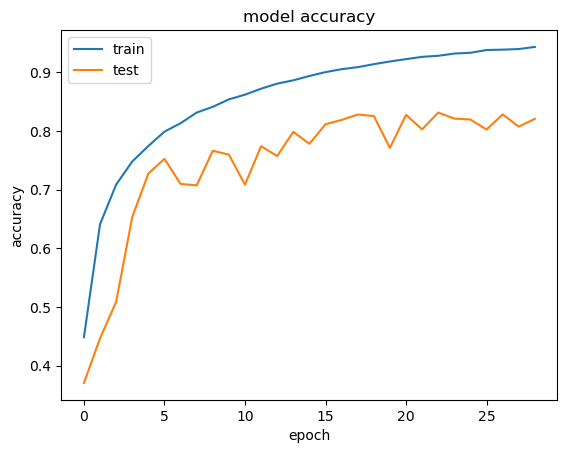

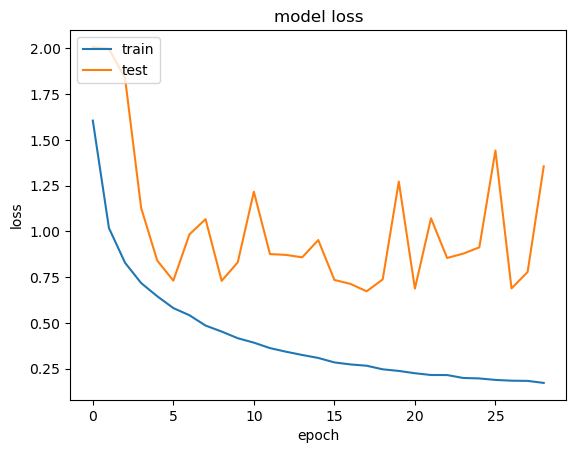

In [74]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()